In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',569)
pd.set_option('display.max_columns',33)

In [3]:
dt = pd.read_csv('data.csv')

In [4]:
dt.shape

(569, 33)

In [5]:
dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## exploratory Data Analysis

#### objectif :
* comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriére)
* Développer une premier stratégie de modélisation

#### Analyse de forme :
* **variable target** : diagnosis
* **lignes et colonnes** : 569, 33
* **types de variables** : float 31 ( 93.33 %) int 1(index) (3.03%) object 1 (3.03%)
* **Analyse des valeurs manquantes**: une seule column dont manque tt les valeur -> eliminer 

In [6]:
df = dt.copy()

In [7]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [8]:
df.dtypes.value_counts(normalize=True)*100

float64    93.939394
int64       3.030303
object      3.030303
dtype: float64

In [9]:
df.select_dtypes('int').columns

Index([], dtype='object')

<AxesSubplot:>

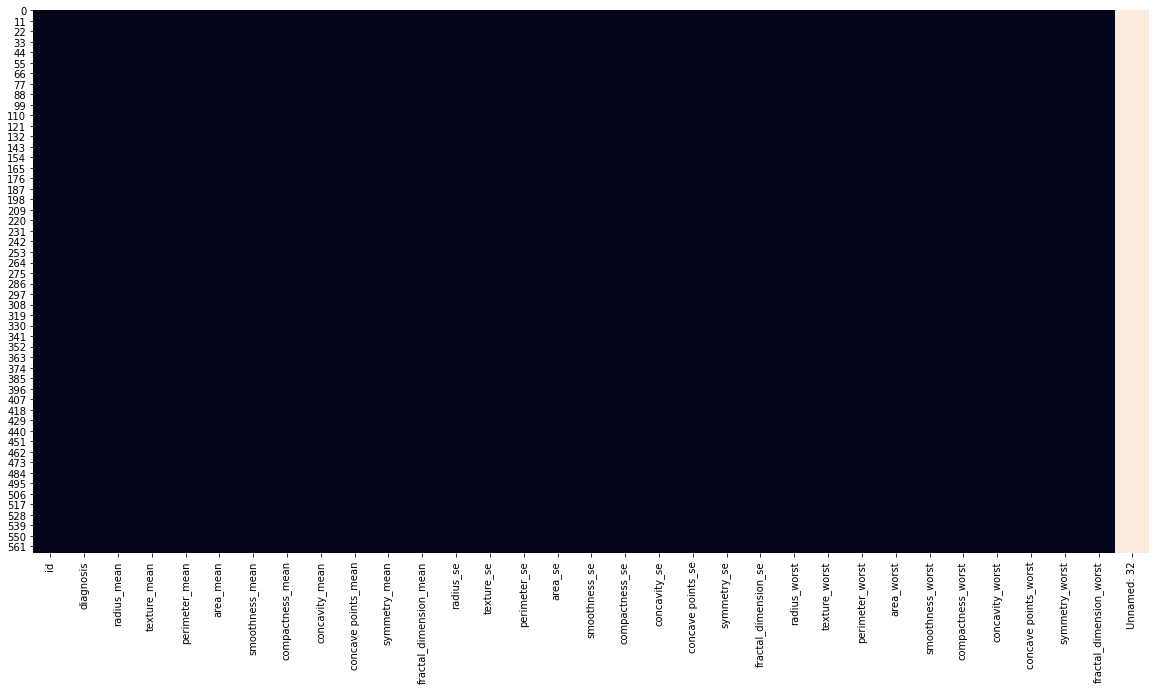

In [10]:
plt.figure(figsize= (20,10))
sns.heatmap(df.isna(),cbar=False)

In [11]:
df.isna().sum()/df.shape[0]

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

In [12]:
df.drop(columns=["Unnamed: 32"],inplace=True)

In [13]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Analyse de Fond:
* **visualisation de la target** : B   :  62.7417% |  M  :   37.2583%
* **signification des variables** :
        * les variables continues ne sont pas sdandarisées
        * la seul variable qualitatives est le taget
* **Relation variables / target** : fractla_dimension_se,symmetry_se,smoothness_se,texture_se,fracta_dimension

In [14]:
df.drop(columns=["id"],inplace=True)

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df["diagnosis"].value_counts(normalize = True)*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

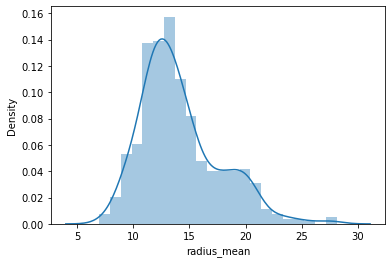

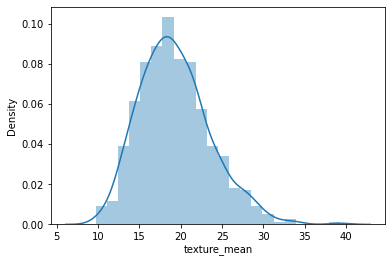

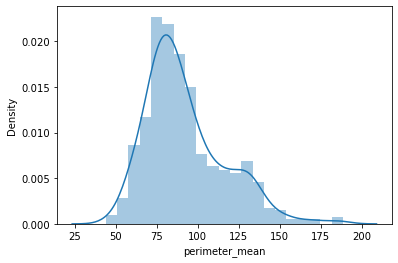

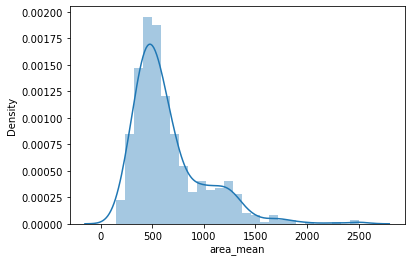

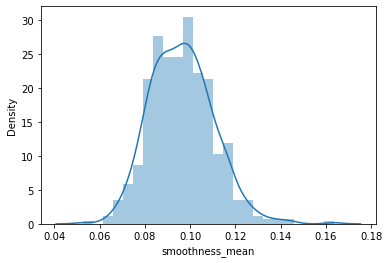

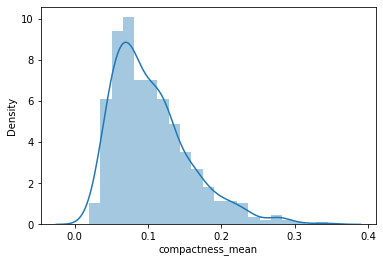

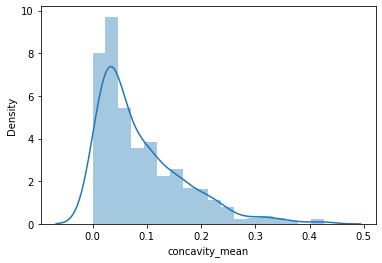

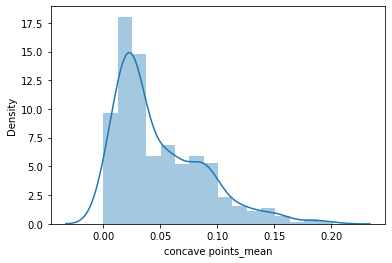

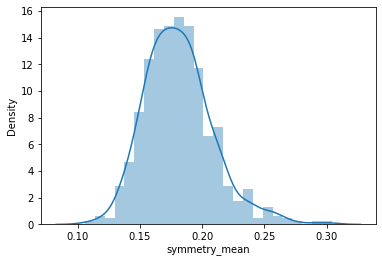

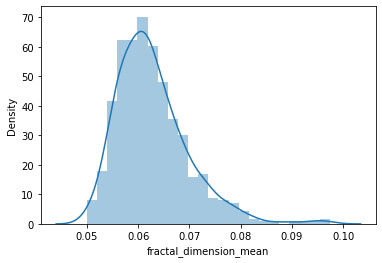

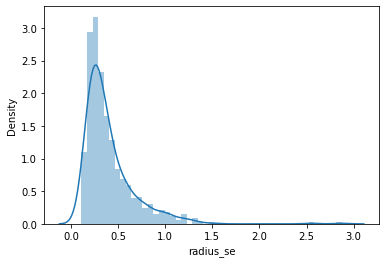

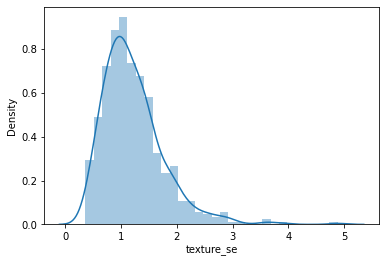

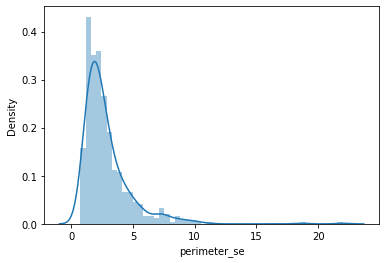

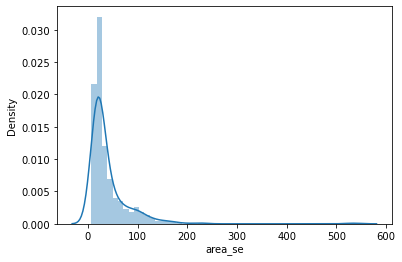

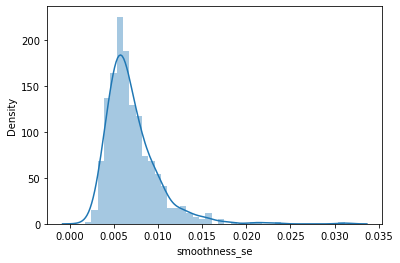

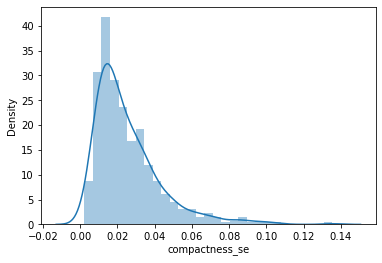

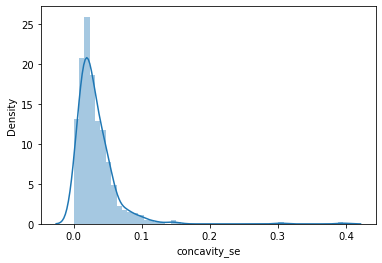

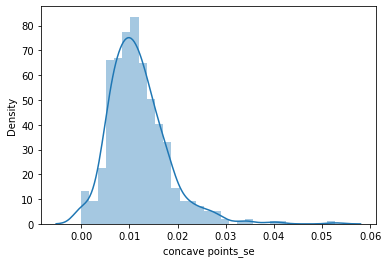

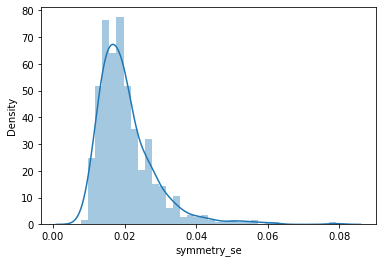

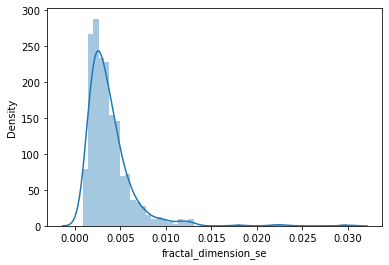

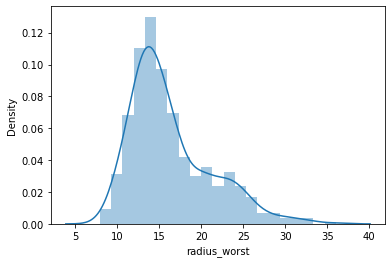

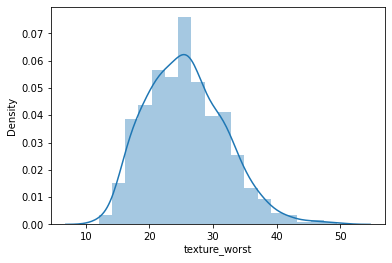

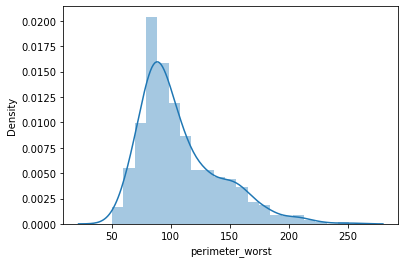

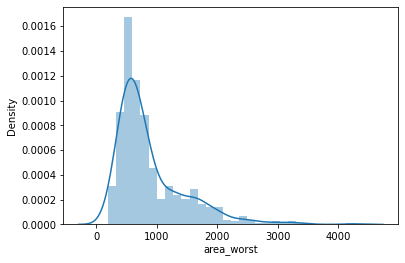

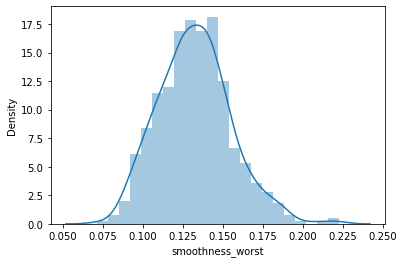

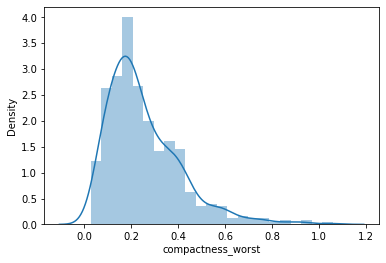

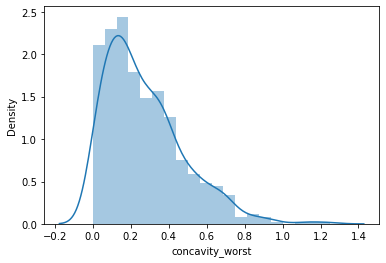

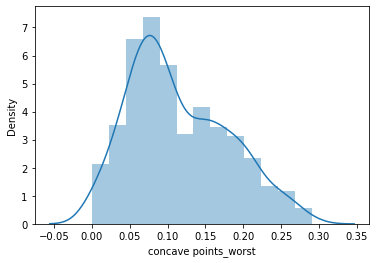

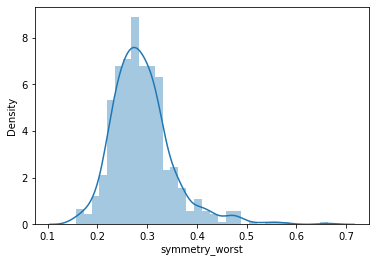

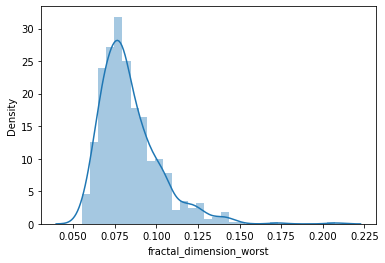

In [17]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [18]:
df.select_dtypes('object').columns

Index(['diagnosis'], dtype='object')

In [19]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:ylabel='diagnosis'>

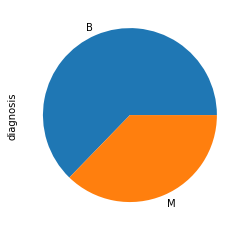

In [20]:
df["diagnosis"].value_counts().plot.pie()

In [21]:
B_df = df[df['diagnosis'] == 'B'] 
M_df = df[df['diagnosis'] == 'M']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

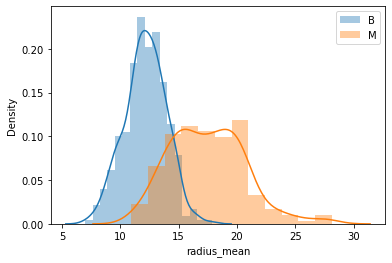

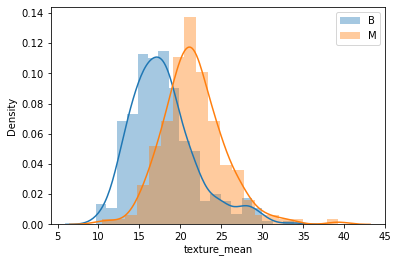

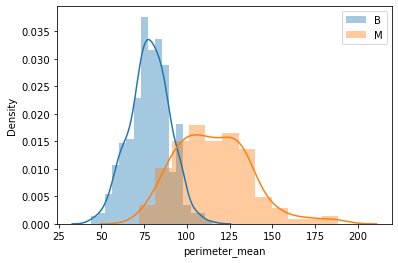

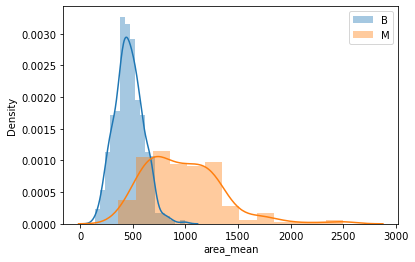

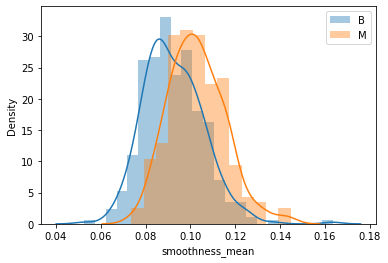

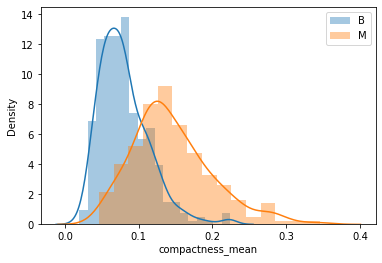

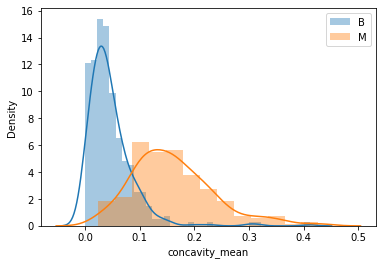

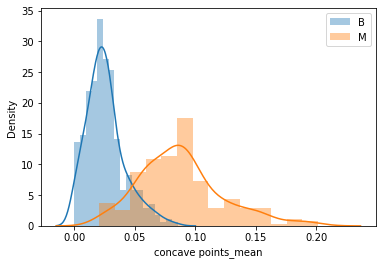

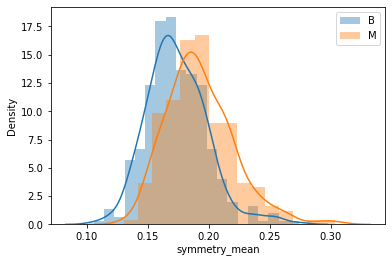

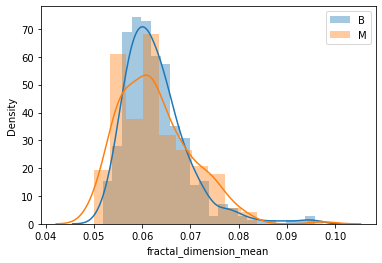

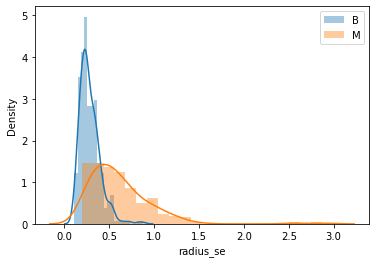

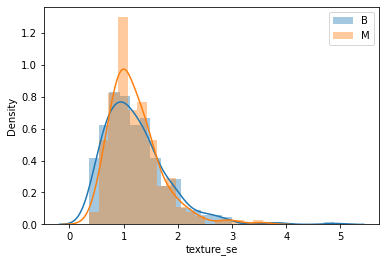

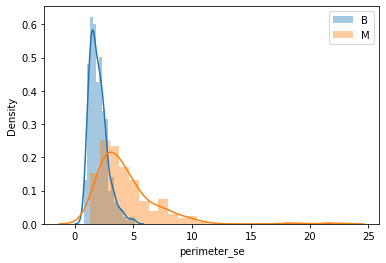

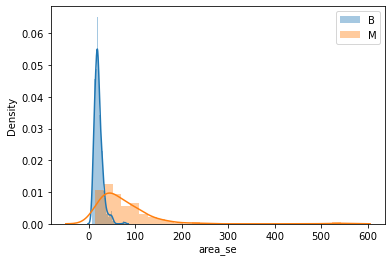

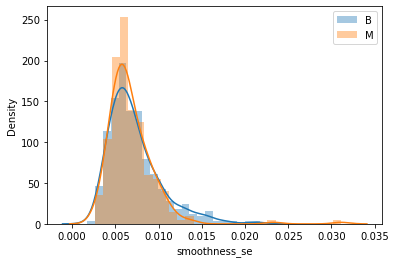

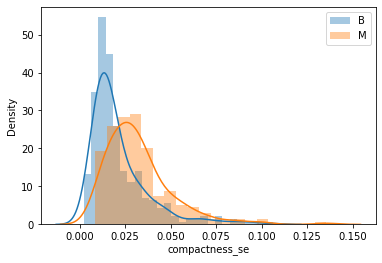

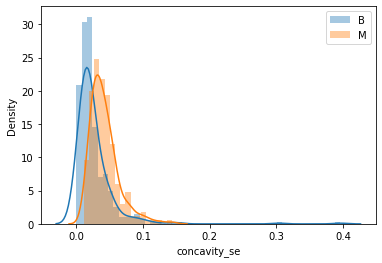

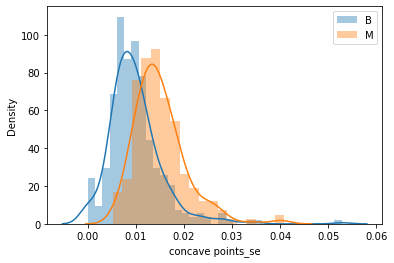

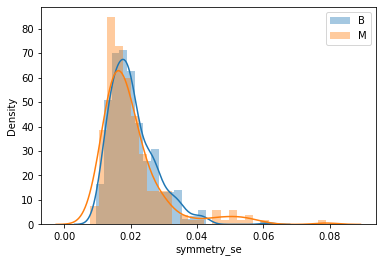

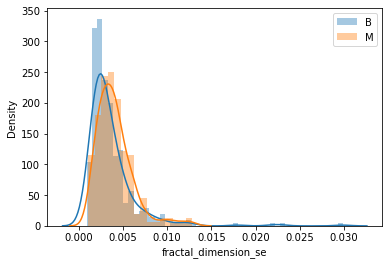

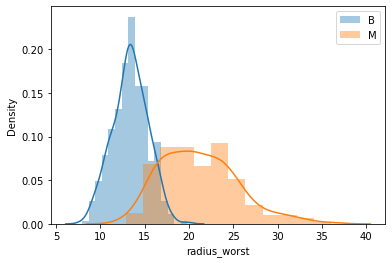

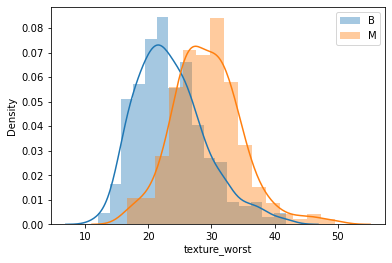

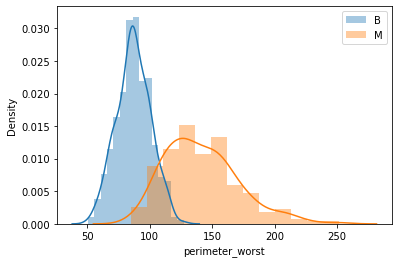

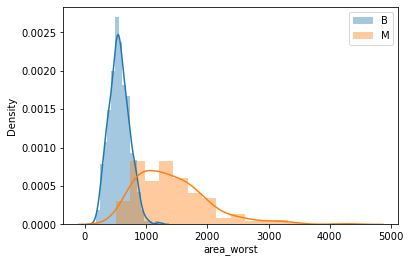

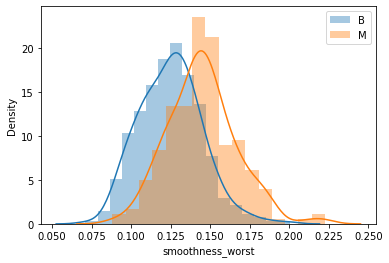

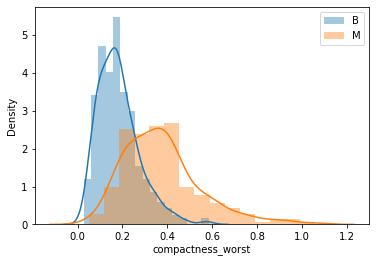

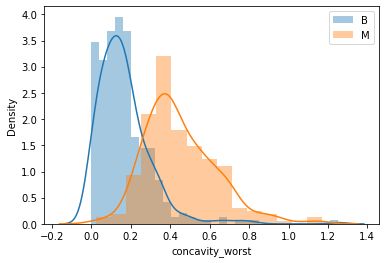

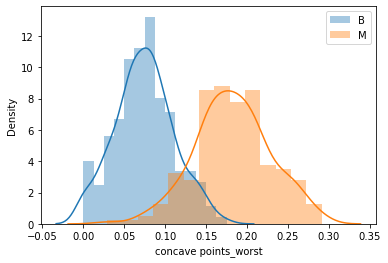

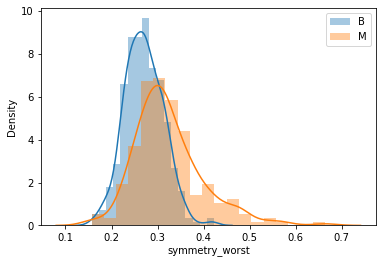

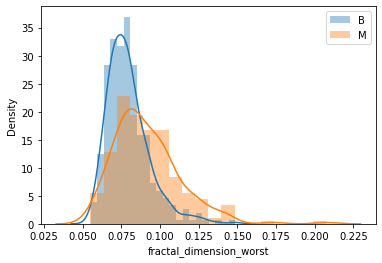

In [22]:
for col in df.drop(columns=["diagnosis"]).columns:
    plt.figure()
    sns.distplot(B_df[col],label = "B")
    sns.distplot(M_df[col],label = "M")
    plt.legend()

## Analyse plus détaillée 
* **Relation Variables / Variables** : il y a bcp de correlation

<AxesSubplot:>

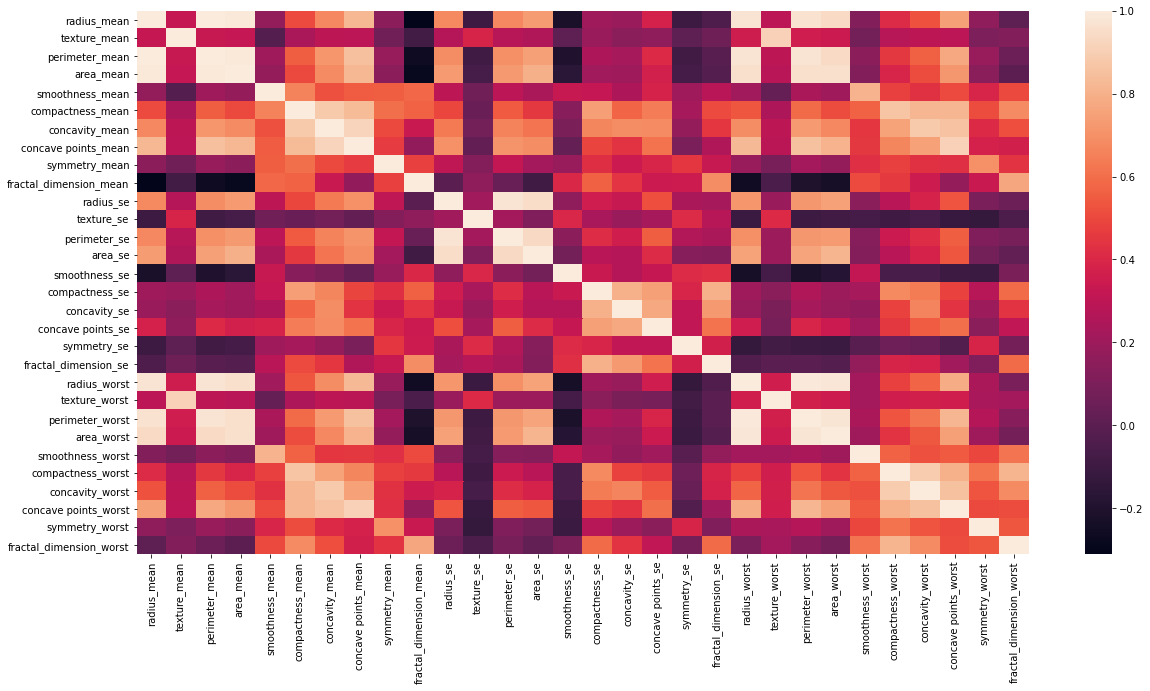

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(columns=["diagnosis"]).corr())

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
trainset,testset = train_test_split(df,test_size =0.2,random_state=0)

In [26]:
trainset['diagnosis'].value_counts()

B    290
M    165
Name: diagnosis, dtype: int64

In [27]:
testset['diagnosis'].value_counts()

B    67
M    47
Name: diagnosis, dtype: int64

In [28]:
def preprocessing(df):
    x = df.drop('diagnosis', axis=1)
    y = df["diagnosis"]
    
    print(y.value_counts())
    
    return x,y

In [29]:
x_train , y_train = preprocessing(trainset)
x_test , y_test = preprocessing(testset)

B    290
M    165
Name: diagnosis, dtype: int64
B    67
M    47
Name: diagnosis, dtype: int64


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [31]:
model = LogisticRegression()

In [32]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    return model.score(x_test,y_test)

In [33]:
evaluation(model)

[[63  4]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9473684210526315

In [34]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [36]:
model=make_pipeline(StandardScaler(),LogisticRegression())

In [37]:
evaluation(model)

[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



0.9649122807017544

In [38]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    n, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, train_sizes=np.linspace(0.1,1,10))
    print(model.score(x_test,y_test))
    
    plt.figure(figsize=(12,8))
    plt.plot(n, train_score.mean(axis=1), label = 'train')
    plt.plot(n, val_score.mean(axis=1), label = 'validation')
    plt.legend()

[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


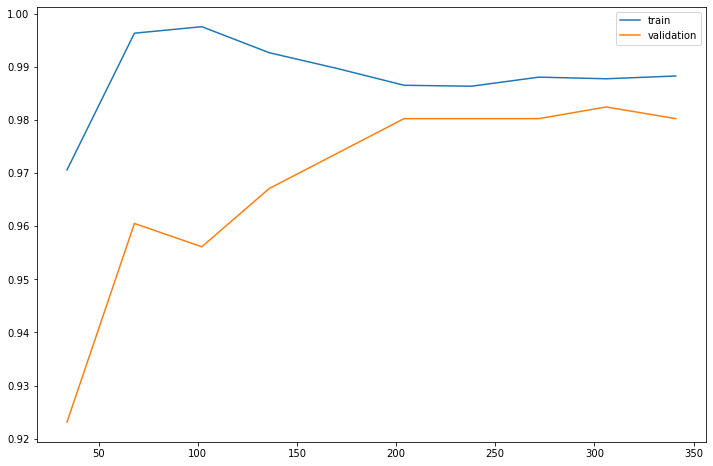

In [39]:
evaluation(model)

In [40]:
x_train.shape

(455, 30)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
knn = make_pipeline(StandardScaler(),KNeighborsClassifier(3))
sgd = make_pipeline(StandardScaler(),SGDClassifier())
tree = make_pipeline(StandardScaler(),DecisionTreeClassifier())

In [43]:
rl = make_pipeline(StandardScaler(),LogisticRegression())

In [44]:
list_de_moduls =  {"knn":knn,"sgd":sgd,"tree":tree,"rl":rl}

knn
[[67  0]
 [ 5 42]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        67
           M       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
sgd
[[62  5]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.93      0.95        67
           M       0.90      0.96      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702
tree
[[59  8]
 [ 3 44]]
              precision    recall  f1-score   support

           B       0.95      0.88      0.91        67
           M       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.

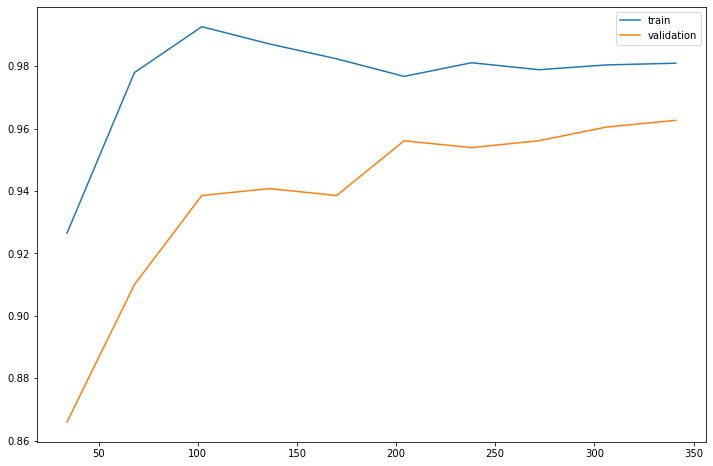

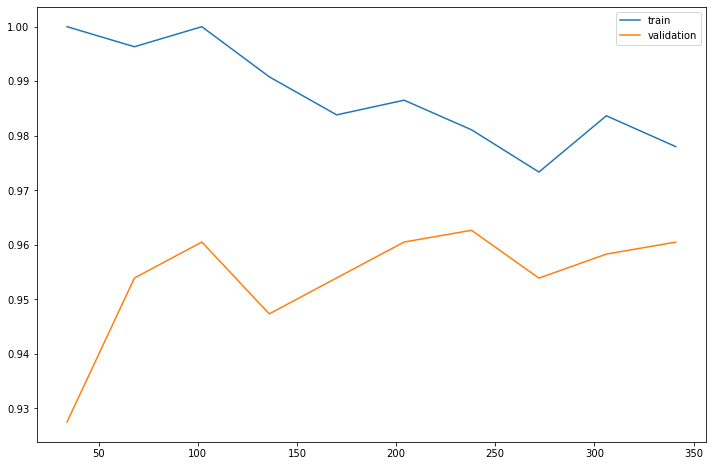

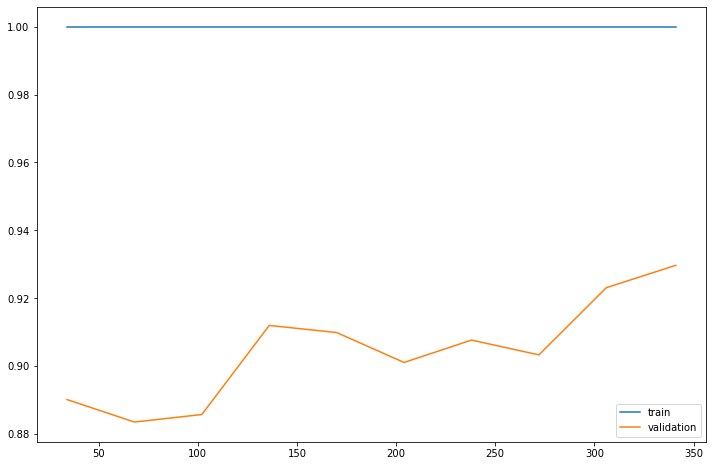

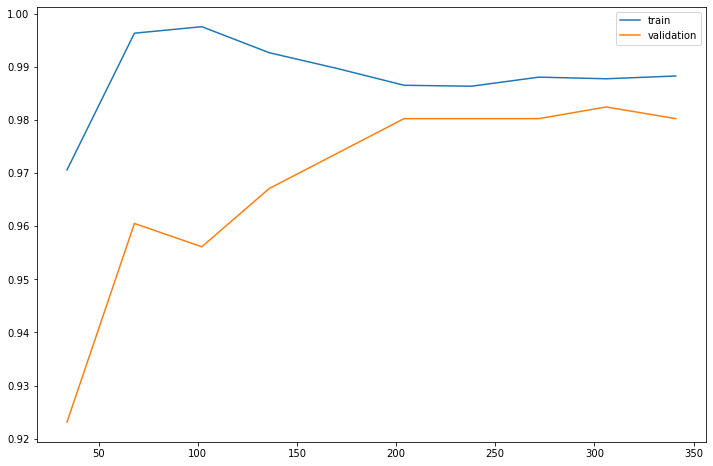

In [45]:
for model in list_de_moduls:
    print(model)
    evaluation(list_de_moduls[model])

#### tester le model knn

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [48]:
para={"kneighborsclassifier__n_neighbors":np.arange(1,100),
     "kneighborsclassifier__metric":['euclidean','manhattan','chebyshev',"minkowski"]}
cv=StratifiedKFold(4,shuffle=True)

In [49]:
grid = GridSearchCV(knn,param_grid=para,cv=cv)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'chebyshev',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,

In [50]:
grid.best_score_

0.9692400248408632

In [51]:
grid.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 3}

In [52]:
knn_1 = grid.best_estimator_

In [53]:
ypred = knn_1.predict(x_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
    
n, train_score, val_score = learning_curve(knn_1, x_train, y_train, cv=cv, train_sizes=np.linspace(0.1,1,10))
print(knn_1.score(x_test,y_test))

[[67  0]
 [ 5 42]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        67
           M       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


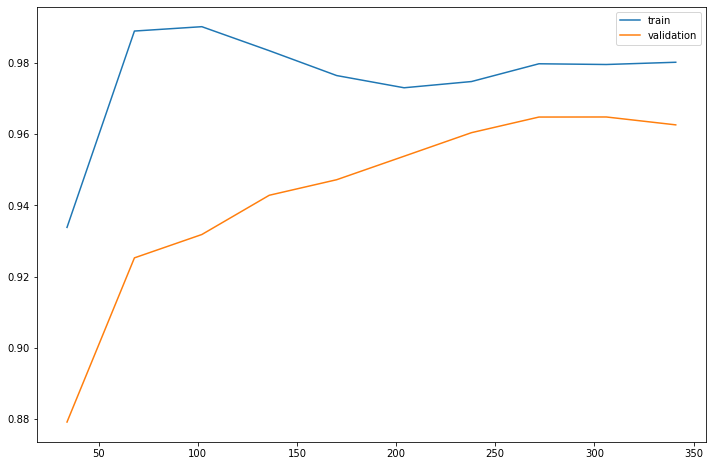

In [54]:
plt.figure(figsize=(12,8))
plt.plot(n, train_score.mean(axis=1), label = 'train')
plt.plot(n, val_score.mean(axis=1), label = 'validation')
plt.legend()

In [57]:
df.drop(columns=["fractal_dimension_se","symmetry_se","smoothness_se","texture_se","fractal_dimension_mean"])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,1.0950,8.5890,153.400,0.049040,0.053730,0.015870,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.5435,3.3980,74.080,0.013080,0.018600,0.013400,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.7456,4.5850,94.030,0.040060,0.038320,0.020580,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.4956,3.4450,27.230,0.074580,0.056610,0.018670,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.7572,5.4380,94.440,0.024610,0.056880,0.018850,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.3345,2.2170,27.190,0.033450,0.036720,0.011370,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.4467,3.1800,53.910,0.013820,0.022540,0.010390,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.5835,3.8560,50.960,0.030290,0.024880,0.014480,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.3063,2.4060,24.320,0.035020,0.035530,0.012260,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.2976,2.0390,23.940,0.072170,0.077430,0.014320,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [56]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [60]:
trainset,testset = train_test_split(df.drop(columns=["fractal_dimension_se","symmetry_se","smoothness_se","texture_se","fractal_dimension_mean"]),test_size =0.2,random_state=0)

In [61]:
x_train , y_train = preprocessing(trainset)
x_test , y_test = preprocessing(testset)

B    290
M    165
Name: diagnosis, dtype: int64
B    67
M    47
Name: diagnosis, dtype: int64


In [63]:
knn_1.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])

In [64]:
knn_1.score(x_test,y_test)

0.956140350877193